In [276]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict

In [277]:
with open('new_releases.json') as f:
    data = json.load(f)

### EXPLORING JSON SCHEMAS
Recall that JSON files have a nested structure. The deepest levels of our object will contain individual values: numbers, booleans or strings. These in turn will be stored in the equivalents of Python lists and dictionaries, usually with many levels of nesting.

If you try to look at a raw JSON file, you will likely have a hard time understanding the structure. To more easily make sense of it, we will proceed through each level methodically.

In [278]:
#This will look messy
data

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20',
  'items': [{'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
      'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
      'id': '1RyvyyTE3xzB2ZywiAwp0i',
      'name': 'Future',
      'type': 'artist',
      'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
    'available_markets': ['AD',
     'AE',
     'AR',
     'AT',
     'AU',
     'BE',
     'BG',
     'BH',
     'BO',
     'BR',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HU',
     'ID',
     'IE',
     'IL',
     'IN',
     'IS',
     'IT',
     'JO',
     'JP',
     'KW',
     'LB',
     'LI',
     'LT',
     'LU',
     'LV',
     'MA',
     

### To start exploring, lets check the type of our new data object and start mapping out the hierachy

In [279]:
type(data) #dict has keys so we check that

dict

In [280]:
data.keys()

dict_keys(['albums'])

### in this case, there is only a single key, 'albums', so we'll continue on pathway to exploring the hierrachy.Lets start by checking the type of this nested structure

In [281]:
type(data['albums'])

dict

In [282]:
data['albums'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

### If we continue checking individual data types,we'd have to alot to go through.To simplify this we use a for loop

In [283]:
for key, value in data['albums'].items():
    print(key,type(value))

href <class 'str'>
items <class 'list'>
limit <class 'int'>
next <class 'str'>
offset <class 'int'>
previous <class 'NoneType'>
total <class 'int'>


### let's takr a look at the items list - this contains the album information and is more nested than the rest

In [284]:
type(data['albums']['items']) #list

list

In [285]:
data['albums']['items'][0]

{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
   'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
   'id': '1RyvyyTE3xzB2ZywiAwp0i',
   'name': 'Future',
   'type': 'artist',
   'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
 'available_markets': ['AD',
  'AE',
  'AR',
  'AT',
  'AU',
  'BE',
  'BG',
  'BH',
  'BO',
  'BR',
  'CA',
  'CH',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DE',
  'DK',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FR',
  'GB',
  'GR',
  'GT',
  'HK',
  'HN',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IS',
  'IT',
  'JO',
  'JP',
  'KW',
  'LB',
  'LI',
  'LT',
  'LU',
  'LV',
  'MA',
  'MC',
  'MT',
  'MX',
  'MY',
  'NI',
  'NL',
  'NO',
  'NZ',
  'OM',
  'PA',
  'PE',
  'PH',
  'PL',
  'PS',
  'PT',
  'PY',
  'QA',
  'RO',
  'SA',
  'SE',
  'SG',
  'SK',
  'SV',
  'TH',
  'TN',
  'TR',
  'TW',
  'US',
  'UY',
  'VN',
  'ZA'],
 'external_urls': 

### We acces values as we would for nested lists or dictionaries in Python

In [286]:
data['albums']['items'][0].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [287]:
for key, value in data['albums']['items'][0].items():
    print(key, type(value))

album_type <class 'str'>
artists <class 'list'>
available_markets <class 'list'>
external_urls <class 'dict'>
href <class 'str'>
id <class 'str'>
images <class 'list'>
name <class 'str'>
release_date <class 'str'>
release_date_precision <class 'str'>
total_tracks <class 'int'>
type <class 'str'>
uri <class 'str'>


In [288]:
#check artists keys its a list
data['albums']['items'][0]['artists'][0]['name']

'Future'

In [289]:
data['albums']['items'][1]['artists'][0]['name']

'Kygo'

### Loading in Plant data

In [290]:
with open('plants.json') as f:
    plants = json.load(f)

In [291]:
type(plants)

list

In [292]:
len(plants)

1000

### What information do we have

In [293]:
plants[0]

{'id': 678281,
 'common_name': 'Evergreen oak',
 'slug': 'quercus-rotundifolia',
 'scientific_name': 'Quercus rotundifolia',
 'year': 1785,
 'bibliography': 'Encycl. 1: 723 (1785)',
 'author': 'Lam.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Beech family',
 'genus_id': 5778,
 'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
 'synonyms': ['Quercus lyauteyi',
  'Quercus rotundifolia f. crassicupulata',
  'Quercus ballota',
  'Quercus ilex f. brevicupulata',
  'Quercus calycina',
  'Quercus rotundifolia f. dolichocalyx',
  'Quercus rotundifolia f. pilosella',
  'Quercus rotundifolia f. macrocarpa',
  'Quercus rotundifolia f. calycina',
  'Quercus ilex f. macrocarpa',
  'Quercus ilex subsp. ballota',
  'Quercus rotundifolia var. pilosella',
  'Quercus rotundifolia var. brevicupulata',
  'Quercus rotundifolia subsp. maghrebiana',
  'Quercus rotundifolia f. brevicupulata',
  'Quercus rotundifolia var. macrocarpa'],
 'genus': '

In [294]:
for key, value in plants[0].items():
    print(key, type(value))

id <class 'int'>
common_name <class 'str'>
slug <class 'str'>
scientific_name <class 'str'>
year <class 'int'>
bibliography <class 'str'>
author <class 'str'>
status <class 'str'>
rank <class 'str'>
family_common_name <class 'str'>
genus_id <class 'int'>
image_url <class 'str'>
synonyms <class 'list'>
genus <class 'str'>
family <class 'str'>
links <class 'dict'>


### plant families
check what botanical families are represented in our data.
we'll build a dictionary that counts the plants by family

In [295]:
plant_dict= defaultdict(int)
for plant in plants:
        plant_dict[plant['family_common_name']]+=1
plant_dict



defaultdict(int,
            {'Beech family': 10,
             'Nettle family': 2,
             'Grass family': 81,
             'Plantain family': 25,
             'Buttercup family': 21,
             'Pea family': 63,
             'Olive family': 5,
             'Rose family': 49,
             'Birch family': 7,
             'Rush family': 19,
             'Buckwheat family': 17,
             'Soapberry family': 7,
             'Pine family': 10,
             'Mint family': 45,
             'Madder family': 9,
             None: 113,
             'Pink family': 31,
             'Carrot family': 29,
             'Geranium family': 10,
             'Aster family': 80,
             'Horsetail family': 7,
             'Heath family': 17,
             'Loosestrife family': 2,
             'Bracken Fern family': 1,
             'Mustard family': 29,
             'Evening Primrose family': 10,
             'Willow family': 3,
             'Polypody family': 7,
             'Dogwood family':

In [296]:
sorted(list(plant_dict.items()),key=lambda x:x[1])

[('Bracken Fern family', 1),
 ('Iris family', 1),
 ('Holly family', 1),
 ('Water-plantain family', 1),
 ('Hemp family', 1),
 ('Buckbean family', 1),
 ('Ginseng family', 1),
 ('Sandalwood family', 1),
 ('Yam family', 1),
 ('Walnut family', 1),
 ('Boxwood family', 1),
 ('Melastome family', 1),
 ('Purslane family', 1),
 ('Pokeweed family', 1),
 ('Bayberry family', 1),
 ('Hornwort family', 1),
 ('Leadwort family', 1),
 ('Cucumber family', 1),
 ('Eel-grass family', 1),
 ('Flowering Rush family', 1),
 ('Spike-moss family', 1),
 ('Barberry family', 1),
 ('Oleaster family', 1),
 ('Acanthus family', 1),
 ('Calamus family', 1),
 ('Birthwort family', 1),
 ('Nettle family', 2),
 ('Loosestrife family', 2),
 ('Bittersweet family', 2),
 ('Sumac family', 2),
 ('Elm family', 2),
 ('Flax family', 2),
 ('Sundew family', 2),
 ('Milkwort family', 2),
 ('Cypress family', 2),
 ('Myrtle family', 2),
 ('Water-lily family', 2),
 ('Mignonette family', 2),
 ('Bladderwort family', 2),
 ('Grape family', 2),
 ('Arro

In [297]:
plant_dict.keys()

dict_keys(['Beech family', 'Nettle family', 'Grass family', 'Plantain family', 'Buttercup family', 'Pea family', 'Olive family', 'Rose family', 'Birch family', 'Rush family', 'Buckwheat family', 'Soapberry family', 'Pine family', 'Mint family', 'Madder family', None, 'Pink family', 'Carrot family', 'Geranium family', 'Aster family', 'Horsetail family', 'Heath family', 'Loosestrife family', 'Bracken Fern family', 'Mustard family', 'Evening Primrose family', 'Willow family', 'Polypody family', 'Dogwood family', 'Honeysuckle family', 'Morning-glory family', 'Iris family', 'Spleenwort family', 'Amaranth family', 'Sedge family', 'Buckthorn family', 'Holly family', 'Potato family', 'Bellflower family', 'Wood-Sorrel family', 'Borage family', 'Bittersweet family', 'Primrose family', 'Poppy family', 'Spurge family', 'Cat-tail family', 'Arum family', 'Water-plantain family', 'Hemp family', 'Sumac family', 'Touch-me-not family', 'Broom-rape family', 'Elm family', 'Flax family', 'Stonecrop family'

In [298]:
plant_dict['Beech family'] #type:ignore

10

### Are there any missing values

In [299]:
plant_dict[None]

113

### lets remove them by using a dictionaty comprehension

In [300]:
fams_clean = {fam:num for fam,num in plant_dict.items() if fam!=None}
fams_clean

{'Beech family': 10,
 'Nettle family': 2,
 'Grass family': 81,
 'Plantain family': 25,
 'Buttercup family': 21,
 'Pea family': 63,
 'Olive family': 5,
 'Rose family': 49,
 'Birch family': 7,
 'Rush family': 19,
 'Buckwheat family': 17,
 'Soapberry family': 7,
 'Pine family': 10,
 'Mint family': 45,
 'Madder family': 9,
 'Pink family': 31,
 'Carrot family': 29,
 'Geranium family': 10,
 'Aster family': 80,
 'Horsetail family': 7,
 'Heath family': 17,
 'Loosestrife family': 2,
 'Bracken Fern family': 1,
 'Mustard family': 29,
 'Evening Primrose family': 10,
 'Willow family': 3,
 'Polypody family': 7,
 'Dogwood family': 3,
 'Honeysuckle family': 9,
 'Morning-glory family': 3,
 'Iris family': 1,
 'Spleenwort family': 8,
 'Amaranth family': 6,
 'Sedge family': 41,
 'Buckthorn family': 3,
 'Holly family': 1,
 'Potato family': 7,
 'Bellflower family': 9,
 'Wood-Sorrel family': 3,
 'Borage family': 13,
 'Bittersweet family': 2,
 'Primrose family': 12,
 'Poppy family': 7,
 'Spurge family': 10,
 

In [301]:
fams_clean[None]

KeyError: None

### lets remove the families whose counts are less than ten

In [ ]:
fams_clean = {fam:num for fam,num in fams_clean.items() if num>=10}
fams_clean


{'Beech family': 10,
 'Grass family': 81,
 'Plantain family': 25,
 'Buttercup family': 21,
 'Pea family': 63,
 'Rose family': 49,
 'Rush family': 19,
 'Buckwheat family': 17,
 'Pine family': 10,
 'Mint family': 45,
 'Pink family': 31,
 'Carrot family': 29,
 'Geranium family': 10,
 'Aster family': 80,
 'Heath family': 17,
 'Mustard family': 29,
 'Evening Primrose family': 10,
 'Sedge family': 41,
 'Borage family': 13,
 'Primrose family': 12,
 'Spurge family': 10,
 'Broom-rape family': 10,
 'Tape-grass family': 10}

### Now we can make a chart of the numbers

In [ ]:
#my code
names = list(fams_clean.keys())
print(names)
values = list(fams_clean.values())
values

['Beech family', 'Grass family', 'Plantain family', 'Buttercup family', 'Pea family', 'Rose family', 'Rush family', 'Buckwheat family', 'Pine family', 'Mint family', 'Pink family', 'Carrot family', 'Geranium family', 'Aster family', 'Heath family', 'Mustard family', 'Evening Primrose family', 'Sedge family', 'Borage family', 'Primrose family', 'Spurge family', 'Broom-rape family', 'Tape-grass family']


[10,
 81,
 25,
 21,
 63,
 49,
 19,
 17,
 10,
 45,
 31,
 29,
 10,
 80,
 17,
 29,
 10,
 41,
 13,
 12,
 10,
 10,
 10]

<BarContainer object of 23 artists>

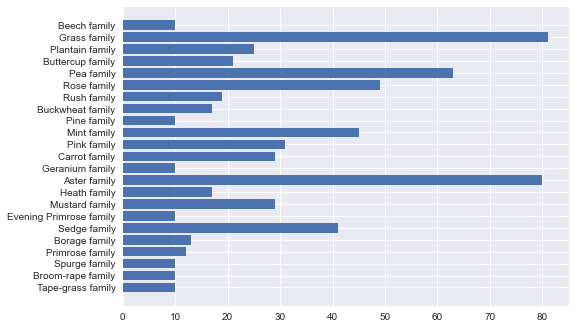

In [ ]:
plt.barh(names[::-1],values[::-1])

<AxesSubplot:>

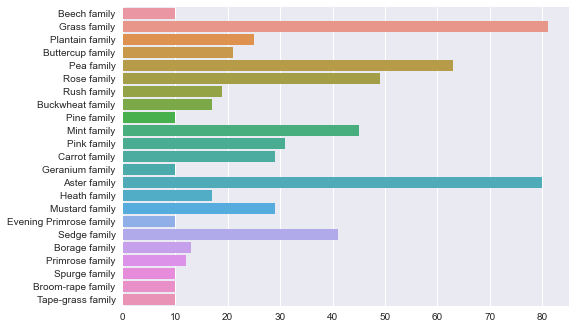

In [ ]:
import seaborn as sns
sns.barplot(x=values,y=names,orient='h')

In [ ]:
# teachers code
plt.style.use('seaborn')

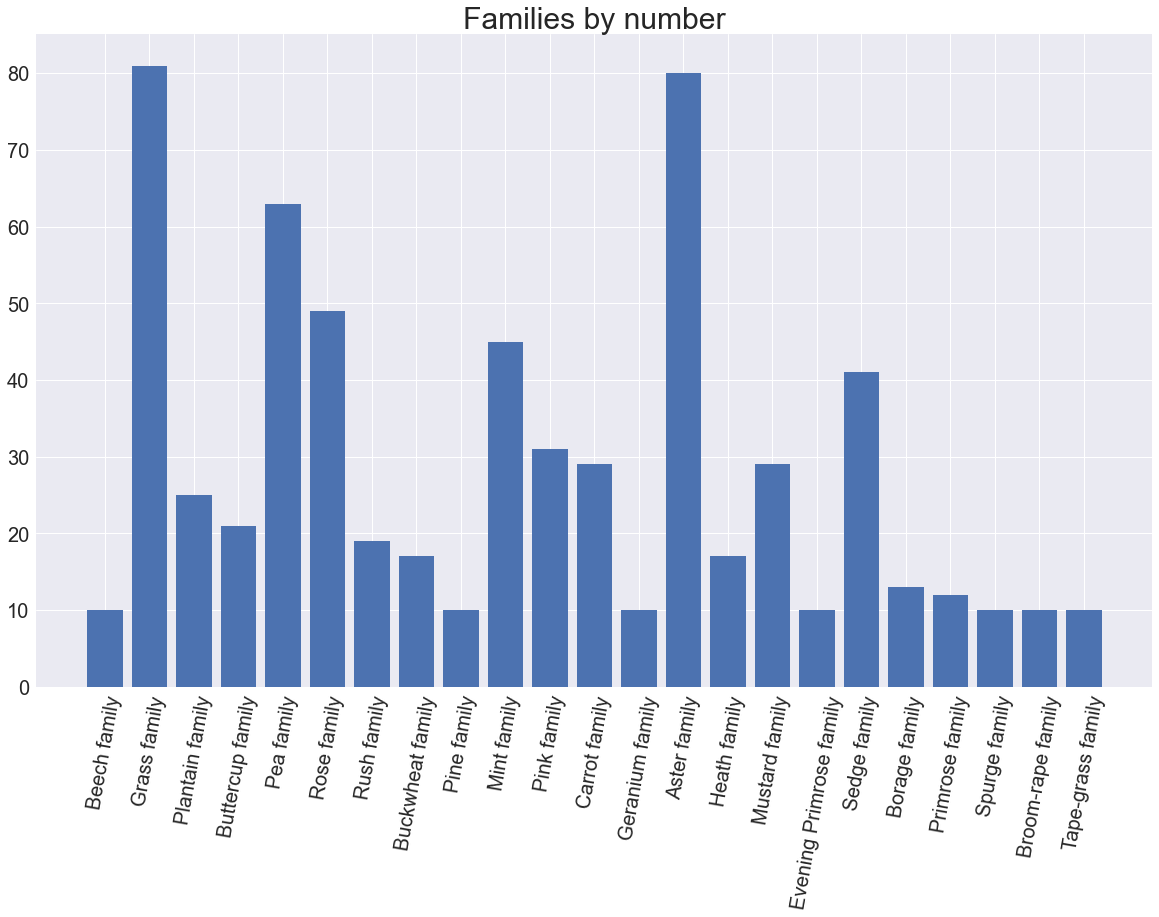

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.bar(list(fams_clean.keys()),list(fams_clean.values()))
ax.set_title('Families by number',fontsize=30)
plt.xticks(rotation=80,fontsize=20)
plt.yticks(fontsize=20);

### Synonyms
Suppose we wanted to know how many synonymous names were listed for each plant. 

In [ ]:
len(plants[0]['synonyms'])

16

In [ ]:
#For loop
for plant in plants:
    print(len(plant['synonyms']))

16
6
31
37
121
192
20
17
4
62
29
36
43
14
13
15
32
8
18
12
43
78
28
41
81
23
15
24
16
72
8
16
30
65
47
11
46
4
178
41
71
39
7
24
14
6
9
41
32
6
40
14
76
37
23
6
37
129
28
40
31
64
20
26
15
25
21
9
6
33
17
20
10
17
17
38
49
21
11
41
22
28
34
21
11
22
24
85
14
12
10
12
0
54
6
74
18
29
21
8
15
30
38
57
9
68
38
69
13
128
56
12
13
10
39
151
25
54
19
14
13
48
12
31
33
11
67
36
7
47
13
29
12
5
26
21
17
10
22
42
66
63
19
29
97
49
28
14
17
15
48
13
15
27
20
49
8
9
14
8
3
13
6
41
42
27
26
14
17
23
14
24
25
2
7
19
40
13
73
17
44
16
5
12
11
35
79
5
29
10
6
19
14
28
21
32
16
28
4
10
40
6
9
15
6
39
13
51
5
12
26
7
56
32
7
28
12
11
1
12
9
53
30
13
11
7
21
7
14
3
14
6
72
109
15
15
18
24
7
53
15
8
30
3
52
3
3
30
10
30
13
16
7
7
9
24
12
32
5
12
1
19
24
20
14
10
43
0
9
12
21
13
25
43
19
8
19
18
12
17
41
8
14
76
24
22
3
14
22
12
143
23
56
57
15
36
10
24
20
8
9
5
3
70
8
67
85
9
8
24
20
16
29
2
1
20
17
1
43
25
43
18
7
20
25
23
20
27
25
39
8
18
1
6
16
55
22
15
7
21
70
4
23
38
3
35
9
33
29
25
16
12
22
14
11
1

In [ ]:
num_syn = [len(plant['synonyms']) for plant in plants]
num_syn

[16,
 6,
 31,
 37,
 121,
 192,
 20,
 17,
 4,
 62,
 29,
 36,
 43,
 14,
 13,
 15,
 32,
 8,
 18,
 12,
 43,
 78,
 28,
 41,
 81,
 23,
 15,
 24,
 16,
 72,
 8,
 16,
 30,
 65,
 47,
 11,
 46,
 4,
 178,
 41,
 71,
 39,
 7,
 24,
 14,
 6,
 9,
 41,
 32,
 6,
 40,
 14,
 76,
 37,
 23,
 6,
 37,
 129,
 28,
 40,
 31,
 64,
 20,
 26,
 15,
 25,
 21,
 9,
 6,
 33,
 17,
 20,
 10,
 17,
 17,
 38,
 49,
 21,
 11,
 41,
 22,
 28,
 34,
 21,
 11,
 22,
 24,
 85,
 14,
 12,
 10,
 12,
 0,
 54,
 6,
 74,
 18,
 29,
 21,
 8,
 15,
 30,
 38,
 57,
 9,
 68,
 38,
 69,
 13,
 128,
 56,
 12,
 13,
 10,
 39,
 151,
 25,
 54,
 19,
 14,
 13,
 48,
 12,
 31,
 33,
 11,
 67,
 36,
 7,
 47,
 13,
 29,
 12,
 5,
 26,
 21,
 17,
 10,
 22,
 42,
 66,
 63,
 19,
 29,
 97,
 49,
 28,
 14,
 17,
 15,
 48,
 13,
 15,
 27,
 20,
 49,
 8,
 9,
 14,
 8,
 3,
 13,
 6,
 41,
 42,
 27,
 26,
 14,
 17,
 23,
 14,
 24,
 25,
 2,
 7,
 19,
 40,
 13,
 73,
 17,
 44,
 16,
 5,
 12,
 11,
 35,
 79,
 5,
 29,
 10,
 6,
 19,
 14,
 28,
 21,
 32,
 16,
 28,
 4,
 10,
 40,
 6,
 9,
 15,
 6,
 

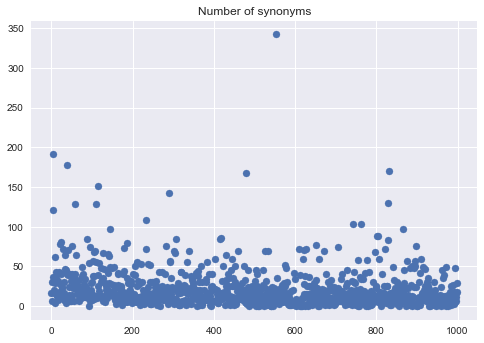

In [ ]:
fig, ax = plt.subplots()
ax.scatter(range(1000),num_syn)
ax.set_title('Number of synonyms');

### Exercise
There's an outlier here. Find the plant with almost 350 synonyms!

In [ ]:
num_syn2 = sorted(num_syn)
num_syn2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,


In [ ]:
#my code
[plant['common_name'] for plant in plants if len(plant['synonyms'])==342]

['Irish potato']

In [ ]:
#Teacher code
[plant['common_name'] for plant in plants if len(plant['synonyms'])>300]

['Irish potato']

In [ ]:
biblios = [plant['bibliography'] for plant in plants]
biblios

['Encycl. 1: 723 (1785)',
 'Sp. Pl.: 984 (1753)',
 'Sp. Pl.: 71 (1753)',
 'Sp. Pl.: 113 (1753)',
 'Sp. Pl.: 996 (1753)',
 'Sp. pl. 1:74.  1753',
 'Sp. Pl.: 554 (1753)',
 'Sp. Pl.: 1048 (1753)',
 'Sp. Pl.: 767 (1753)',
 'Sp. Pl.: 1057 (1753)',
 'Fl. Austriac. 3: 50 (1775)',
 'Sp. Pl.: 768 (1753)',
 'Sp. Pl.: 554 (1753)',
 'Sp. Pl.: 998 (1753)',
 'Sp. Pl.: 998 (1753)',
 'Sp. Pl.: 326 (1753)',
 'Sp. pl. 1:337.  1753, nom. cons.',
 'Sp. Pl.: 28 (1753)',
 'Trudy Imp. S.-Peterburgsk. Bot. Sada 6: 251 (1879)',
 'Sp. pl. 2:1054.  1753',
 'Sp. Pl.: 112 (1753)',
 'Nomencl. Bot., ed. 2, 2: 324 (1841)',
 'Sp. Pl.: 1000 (1753)',
 'Sp. pl. 2:775.  1753',
 'Sp. Pl.: 67 (1753)',
 'Sp. Pl.: 578 (1753)',
 'Sp. Pl.: 477 (1753)',
 'Sp. Pl.: 108 (1753)',
 'Sp. Pl.: 269 (1753)',
 'Sp. Pl.: 85 (1753)',
 'Enum. Stirp. Transsilv. 1: 425 (1816)',
 'Fruct. Sem. Pl. 2: 54 (1790)',
 'Sp. pl. 1:83.  1753',
 'Tent. Fl. Germ. 1: 405 (1788)',
 'Sp. Pl.: 249 (1753)',
 'Sp. Pl.: 681 (1753)',
 'Fl. Excurs. Hafn.: 32 (183

### Let's check the bibliographies for any explicit mention of Linnaeus, the godfather of biological taxonomy. First we'll remove the plants with no bibliography:

In [ ]:
hasbiblio = [plant['bibliography'] for plant in plants if plant['bibliography'] !=None]
hasbiblio

['Encycl. 1: 723 (1785)',
 'Sp. Pl.: 984 (1753)',
 'Sp. Pl.: 71 (1753)',
 'Sp. Pl.: 113 (1753)',
 'Sp. Pl.: 996 (1753)',
 'Sp. pl. 1:74.  1753',
 'Sp. Pl.: 554 (1753)',
 'Sp. Pl.: 1048 (1753)',
 'Sp. Pl.: 767 (1753)',
 'Sp. Pl.: 1057 (1753)',
 'Fl. Austriac. 3: 50 (1775)',
 'Sp. Pl.: 768 (1753)',
 'Sp. Pl.: 554 (1753)',
 'Sp. Pl.: 998 (1753)',
 'Sp. Pl.: 998 (1753)',
 'Sp. Pl.: 326 (1753)',
 'Sp. pl. 1:337.  1753, nom. cons.',
 'Sp. Pl.: 28 (1753)',
 'Trudy Imp. S.-Peterburgsk. Bot. Sada 6: 251 (1879)',
 'Sp. pl. 2:1054.  1753',
 'Sp. Pl.: 112 (1753)',
 'Nomencl. Bot., ed. 2, 2: 324 (1841)',
 'Sp. Pl.: 1000 (1753)',
 'Sp. pl. 2:775.  1753',
 'Sp. Pl.: 67 (1753)',
 'Sp. Pl.: 578 (1753)',
 'Sp. Pl.: 477 (1753)',
 'Sp. Pl.: 108 (1753)',
 'Sp. Pl.: 269 (1753)',
 'Sp. Pl.: 85 (1753)',
 'Enum. Stirp. Transsilv. 1: 425 (1816)',
 'Fruct. Sem. Pl. 2: 54 (1790)',
 'Sp. pl. 1:83.  1753',
 'Tent. Fl. Germ. 1: 405 (1788)',
 'Sp. Pl.: 249 (1753)',
 'Sp. Pl.: 681 (1753)',
 'Fl. Excurs. Hafn.: 32 (183

In [ ]:
print(len(biblios))
print(len(hasbiblio))

1000
994


In [ ]:
Linnaeus = [biblio for biblio in hasbiblio if'Linnaeus' in biblio]
Linnaeus

['Linnaeus, C. (1753). Species plantarum, exhibentes plantas rite cognitas ad genera relatas cum differentiis specificis, nominibus trivialibus, synonymis selectis, locis natalibus, secundum systema sexuale digestas. Stockholm.']

### Which plant is this

In [ ]:
#My code
[plant for plant in plants if plant['bibliography']=='Linnaeus, C. (1753). Species plantarum, exhibentes plantas rite cognitas ad genera relatas cum differentiis specificis, nominibus trivialibus, synonymis selectis, locis natalibus, secundum systema sexuale digestas. Stockholm.']

[{'id': 170295,
  'common_name': 'Little hogweed',
  'slug': 'portulaca-oleracea',
  'scientific_name': 'Portulaca oleracea',
  'year': 1753,
  'bibliography': 'Linnaeus, C. (1753). Species plantarum, exhibentes plantas rite cognitas ad genera relatas cum differentiis specificis, nominibus trivialibus, synonymis selectis, locis natalibus, secundum systema sexuale digestas. Stockholm.',
  'author': 'L.',
  'status': 'accepted',
  'rank': 'species',
  'family_common_name': 'Purslane family',
  'genus_id': 5580,
  'image_url': 'https://bs.plantnet.org/image/o/5defe82d91173cf9450c2f4bc7b673ccd715003e',
  'synonyms': ['Portulaca neglecta',
   'Portulaca retusa',
   'Portulaca parvifolia',
   'Portulaca suffruticosa',
   'Portulaca trianthemoides',
   'Portulaca poellnitziana',
   'Portulaca fosbergii',
   'Portulaca latifolia',
   'Portulaca olitoria',
   'Portulaca maritima',
   'Portulaca papillosa',
   'Portulaca dichotoma',
   'Portulaca pilosa var. marginata',
   'Portulaca stellata',


In [ ]:
# teachers code
#My code
[plant for plant in plants if plant['bibliography']==Linnaeus[0]]

[{'id': 170295,
  'common_name': 'Little hogweed',
  'slug': 'portulaca-oleracea',
  'scientific_name': 'Portulaca oleracea',
  'year': 1753,
  'bibliography': 'Linnaeus, C. (1753). Species plantarum, exhibentes plantas rite cognitas ad genera relatas cum differentiis specificis, nominibus trivialibus, synonymis selectis, locis natalibus, secundum systema sexuale digestas. Stockholm.',
  'author': 'L.',
  'status': 'accepted',
  'rank': 'species',
  'family_common_name': 'Purslane family',
  'genus_id': 5580,
  'image_url': 'https://bs.plantnet.org/image/o/5defe82d91173cf9450c2f4bc7b673ccd715003e',
  'synonyms': ['Portulaca neglecta',
   'Portulaca retusa',
   'Portulaca parvifolia',
   'Portulaca suffruticosa',
   'Portulaca trianthemoides',
   'Portulaca poellnitziana',
   'Portulaca fosbergii',
   'Portulaca latifolia',
   'Portulaca olitoria',
   'Portulaca maritima',
   'Portulaca papillosa',
   'Portulaca dichotoma',
   'Portulaca pilosa var. marginata',
   'Portulaca stellata',


### Matching author with Bibliography

In fact, Species Plantarum (1753) was written by Linnaeus, and "Sp. Pl." in these bibliographies is a reference to that master work. Let's check to see who the author is for these records whose bibliographies start with "Sp. Pl.":

In [315]:
#my code
sps = []
for plant in plants:
    try:
        if plant['bibliography'].startswith('Sp. Pl'):
            sps.append(plant['author'])
    except:
        continue
#sps

['L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',

In [316]:
uniq_auth = list(set(sps))
uniq_auth

['A.Haines (Linnaeus)',
 None,
 'L.',
 '(L.) L.',
 '(J.Presl & C.Presl) Parl.',
 'Willd.']

In [317]:
counts = []
for author in uniq_auth:
    counts.append(sps.count(author))
counts

[1, 1, 439, 2, 1, 1]

In [319]:
dict(zip(uniq_auth,counts))

{'A.Haines (Linnaeus)': 1,
 None: 1,
 'L.': 439,
 '(L.) L.': 2,
 '(J.Presl & C.Presl) Parl.': 1,
 'Willd.': 1}

In [307]:
#teachers code
sps = []
for plant in plants:
    try:
        if plant['bibliography'].startswith('Sp. Pl'):
            sps.append(plant)
    except:
        continue

#sps


In [310]:
sp_authors = [sp['author'] for sp in sps]
#

In [311]:
uniq_auth = list(set(sp_authors))
uniq_auth

['A.Haines (Linnaeus)',
 None,
 'L.',
 '(L.) L.',
 '(J.Presl & C.Presl) Parl.',
 'Willd.']

In [313]:
counts = []
for author in uniq_auth:
    counts.append(sp_authors.count(author))
counts

[1, 1, 439, 2, 1, 1]

In [314]:
dict(zip(uniq_auth,counts))

{'A.Haines (Linnaeus)': 1,
 None: 1,
 'L.': 439,
 '(L.) L.': 2,
 '(J.Presl & C.Presl) Parl.': 1,
 'Willd.': 1}

### Change author to 'L' (for Linnaeus) for all these records

In [328]:
for plant in plants:
        if plant['bibliography']!=None and plant['bibliography'].startswith('Sp. Pl'):
            plant['author']='L.'

In [329]:
#'test'
x = [(plant['bibliography'],plant['author']) for plant in plants]
list(set(x))


[('Sp. Pl.: 228 (1753)', 'L.'),
 ('Ann. Bot. Fenn., 5: 146, 146, 1968', 'T.Koponen'),
 ('Sp. Pl.: 891 (1753)', 'L.'),
 ('Sp. Pl.: 18 (1753)', 'L.'),
 ('Atti Soc. Ital. Sci. Nat. Mus. Civico Storia Nat. Milano 146: 229 (2005)',
  '(L.) Galasso, Banfi & Soldano'),
 ('Sp. pl. 2:735.  1753', 'L.'),
 ('Muscol. Recent. Suppl., 4: 72, 72, 1819', 'Bridel'),
 ('Sp. Pl.: 153 (1753)', 'L.'),
 ('Sp. pl. 2:585.  1753', 'L.'),
 ('Sp. Pl.: 38 (1753)', 'L.'),
 ('Sp. Pl.: 789 (1753)', 'L.'),
 ('Sp. Pl.: 1196 (1753)', 'L.'),
 ('Fl. Angl.: 110 (1762)', '(L.) Huds.'),
 ('Mant. Pl. 2: 202 (1771)', 'L.'),
 ('Animadv. Bot. Spec. Alt. 2: xxii (1764)', 'Ard.'),
 ('Sp. Pl.: 20 (1753)', 'L.'),
 ('Observ. Bot. 5: 28 (1788)', 'Retz.'),
 ('Sp. Musc. Frond., Suppl. 3, 1(1): 216, 216, 1827', 'Schwaegrichen'),
 ('Sp. Pl.: 831 (1753)', 'L.'),
 ('Gard. Dict. ed. 8: n.º 1 (1768)', 'Mill.'),
 ('Flora 4: 557 (1821)', 'Tausch'),
 ('Sp. Pl.: 66 (1753)', 'L.'),
 ('Sp. Pl.: 1026 (1753)', 'L.'),
 ('Petermanns Geogr. Mitt. 17: 2

In [324]:
x = [plant['author'] for plant in plants]
list(set(x))

['(L.) Raeusch.',
 '(L.) Sch.Bip. & F.W.Schultz',
 '(Forssk.) T.Moore ex Woynar',
 'Dumort. (Schrad.)',
 '(Hoffm.) A.Gray',
 'Rich. (L.)',
 '(L.) Rchb.',
 'Schwaegrichen',
 '(L.) Gould',
 'Cav. (L.)',
 '(L.) R.Wilczek',
 'Lindl.',
 '(Scop.) Pollich',
 '(Planch.) H.St.John',
 'DC.',
 '(L.) House',
 '(Bong.) Carrière',
 '(L.) Greuter & Burdet',
 '(Savi) Ten.',
 '(Mill.) Druce',
 'Rich.',
 '(L.) C.Presl',
 '(L.) Schreb.',
 'Rochel',
 'Jacq.',
 '(L.) Chouard ex Rothm.',
 'Honck.',
 'Villar',
 '(L.) Sw.',
 '(L.) S.Fuentes, Uotila & Borsch',
 '(L.) Mill.',
 'P.Beauv.',
 '(Michx.) Watt',
 '(L.) Hartm.',
 'W.D.J.Koch',
 'Franch.',
 '(Wallr.) P.D.Sell & C.West',
 '(L.) P.V.Heath',
 '(Jacq.) Dobrocz.',
 'M.Greenway',
 'Podp.',
 '(Waldst. & Kit.) Rchb.',
 '(L.) F.W.Schmidt',
 'All.',
 'Larkum',
 'Stokes',
 '(Mirb.) Franco',
 'J.C.Wendl.',
 'Ard.',
 'Schott',
 '(L.) R.M.Bateman, Pridgeon & M.W.Chase',
 "(L.) L'Hér.",
 '(L.) DC.',
 'Fleischer',
 '(Sm.) Dumort.',
 '(Ehrenb. ex Solms) Asch.',
 '(Link

### TEASER: Bringing in Pandas:Back to synonymns

In [330]:
plants_df = pd.DataFrame(plants)

In [331]:
plants_df.head()

,id,common_name,slug,scientific_name,year,bibliography,author,status,rank,family_common_name,genus_id,image_url,synonyms,genus,family,links
0,678281,Evergreen oak,quercus-rotundifolia,Quercus rotundifolia,1785.0,Encycl. 1: 723 (1785),Lam.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/1a03948baf0300...,"[Quercus lyauteyi, Quercus rotundifolia f. cra...",Quercus,Fagaceae,{'self': '/api/v1/species/quercus-rotundifolia...
1,190500,Stinging nettle,urtica-dioica,Urtica dioica,1753.0,Sp. Pl.: 984 (1753),L.,accepted,species,Nettle family,1028,https://bs.plantnet.org/image/o/85256a1c2c098e...,"[Urtica major, Urtica tibetica, Urtica sicula,...",Urtica,Urticaceae,"{'self': '/api/v1/species/urtica-dioica', 'pla..."
2,126957,Orchardgrass,dactylis-glomerata,Dactylis glomerata,1753.0,Sp. Pl.: 71 (1753),L.,accepted,species,Grass family,2284,https://bs.plantnet.org/image/o/428f40dadfa028...,"[Koeleria dactylis, Festuca glomerata, Trachyp...",Dactylis,Poaceae,"{'self': '/api/v1/species/dactylis-glomerata',..."
3,167888,Narrowleaf plantain,plantago-lanceolata,Plantago lanceolata,1753.0,Sp. Pl.: 113 (1753),L.,accepted,species,Plantain family,5418,https://bs.plantnet.org/image/o/78a8374f009e6e...,"[Plantago lanceolata var. sphaerostachya, Plan...",Plantago,Plantaginaceae,{'self': '/api/v1/species/plantago-lanceolata'...
4,173327,English oak,quercus-robur,Quercus robur,1753.0,Sp. Pl.: 996 (1753),L.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/2292b670683abd...,"[Quercus longaeva, Quercus salicifolia, Quercu...",Quercus,Fagaceae,"{'self': '/api/v1/species/quercus-robur', 'pla..."


### Exercises
Q1.Add the number of synonymns as new column called 'num_syn'

In [339]:
#my code
plants_df['num_syn'] = plants_df['synonyms'].apply(lambda x : len(x))

In [340]:
#Teacher code
plants_df['num_syn2'] = plants_df['synonyms'].map(len)

In [341]:
plants_df.head()

,id,common_name,slug,scientific_name,year,bibliography,author,status,rank,family_common_name,genus_id,image_url,synonyms,genus,family,links,num_syn,num_syn2
0,678281,Evergreen oak,quercus-rotundifolia,Quercus rotundifolia,1785.0,Encycl. 1: 723 (1785),Lam.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/1a03948baf0300...,"[Quercus lyauteyi, Quercus rotundifolia f. cra...",Quercus,Fagaceae,{'self': '/api/v1/species/quercus-rotundifolia...,16,16
1,190500,Stinging nettle,urtica-dioica,Urtica dioica,1753.0,Sp. Pl.: 984 (1753),L.,accepted,species,Nettle family,1028,https://bs.plantnet.org/image/o/85256a1c2c098e...,"[Urtica major, Urtica tibetica, Urtica sicula,...",Urtica,Urticaceae,"{'self': '/api/v1/species/urtica-dioica', 'pla...",6,6
2,126957,Orchardgrass,dactylis-glomerata,Dactylis glomerata,1753.0,Sp. Pl.: 71 (1753),L.,accepted,species,Grass family,2284,https://bs.plantnet.org/image/o/428f40dadfa028...,"[Koeleria dactylis, Festuca glomerata, Trachyp...",Dactylis,Poaceae,"{'self': '/api/v1/species/dactylis-glomerata',...",31,31
3,167888,Narrowleaf plantain,plantago-lanceolata,Plantago lanceolata,1753.0,Sp. Pl.: 113 (1753),L.,accepted,species,Plantain family,5418,https://bs.plantnet.org/image/o/78a8374f009e6e...,"[Plantago lanceolata var. sphaerostachya, Plan...",Plantago,Plantaginaceae,{'self': '/api/v1/species/plantago-lanceolata'...,37,37
4,173327,English oak,quercus-robur,Quercus robur,1753.0,Sp. Pl.: 996 (1753),L.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/2292b670683abd...,"[Quercus longaeva, Quercus salicifolia, Quercu...",Quercus,Fagaceae,"{'self': '/api/v1/species/quercus-robur', 'pla...",121,121


### Q2. sort the DatFrame by number of synonyms in desceding order

In [344]:
plants_df = plants_df.sort_values(by=['num_syn'])

In [345]:
plants_df.head()

,id,common_name,slug,scientific_name,year,bibliography,author,status,rank,family_common_name,genus_id,image_url,synonyms,genus,family,links,num_syn,num_syn2
267,128969,Dicranum moss,dicranum-scoparium,Dicranum scoparium,1801.0,"Sp. Musc. Frond., 126, 126, 1801",Hedwig,accepted,species,None,2431,None,[],Dicranum,Dicranaceae,"{'self': '/api/v1/species/dicranum-scoparium',...",0,0
613,701034,None,halophila-tricostata,Halophila tricostata,1979.0,Aquatic Bot. 7: 68 (1979),M.Greenway,accepted,species,Tape-grass family,3378,None,[],Halophila,Hydrocharitaceae,{'self': '/api/v1/species/halophila-tricostata...,0,0
960,110933,Convoluted barbula moss,barbula-convoluta,Barbula convoluta,1801.0,"Sp. Musc. Frond., 120, 120, 1801",Hedwig,accepted,species,Mint family,888,None,[],Barbula,Lamiaceae,"{'self': '/api/v1/species/barbula-convoluta', ...",0,0
614,701019,None,halophila-capricorni,Halophila capricorni,1995.0,Aquatic Bot. 51: 320 (1995),Larkum,accepted,species,Tape-grass family,3378,None,[],Halophila,Hydrocharitaceae,{'self': '/api/v1/species/halophila-capricorni...,0,0
616,113414,Orange eye butterflybush,buddleja-davidii,Buddleja davidii,NaN,"Nouv. Arch. Mus. Hist. Nat. sér. 2, 10:65. 18...",Franch.,accepted,species,None,1204,https://bs.plantnet.org/image/o/633907c3c46e34...,[],Buddleja,Scrophulariaceae,"{'self': '/api/v1/species/buddleja-davidii', '...",0,0


### Q3. Grab the image url of the plant that has the fourth-highest no of synonyms

In [361]:
#my answer
x =sorted(list(set(plants_df['num_syn'])))[-4]


int

In [370]:
plants_df[(plants_df['num_syn'] ==x)]

,id,common_name,slug,scientific_name,year,bibliography,author,status,rank,family_common_name,genus_id,image_url,synonyms,genus,family,links,num_syn,num_syn2
832,146845,Prairie junegrass,koeleria-macrantha,Koeleria macrantha,1824.0,Mant. 2: 345 (1824),(Ledeb.) Schult.,accepted,species,Grass family,3900,https://bs.plantnet.org/image/o/29cf598128c50c...,"[Koeleria yukonensis, Aira macrantha, Airochlo...",Koeleria,Poaceae,"{'self': '/api/v1/species/koeleria-macrantha',...",170,170


In [367]:
#teachers answer
plants_df.loc[3,'image_url']

'https://bs.plantnet.org/image/o/78a8374f009e6ed2dc71ca17d18e4271ea0a2a7b'

#### Year
The year is an indication of when a valid name for the plant first appeared in print. Let's build a simple histogram of these years:

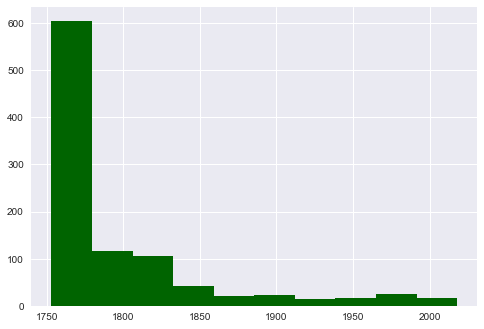

In [371]:
fig, ax = plt.subplots()

ax.hist(plants_df[plants_df['year'] > 0]['year'], color='darkgreen');

### How many plants have first been written about just in the last 20 years? Make a bar chart or pie chart that shows the distribution by family of these plants.

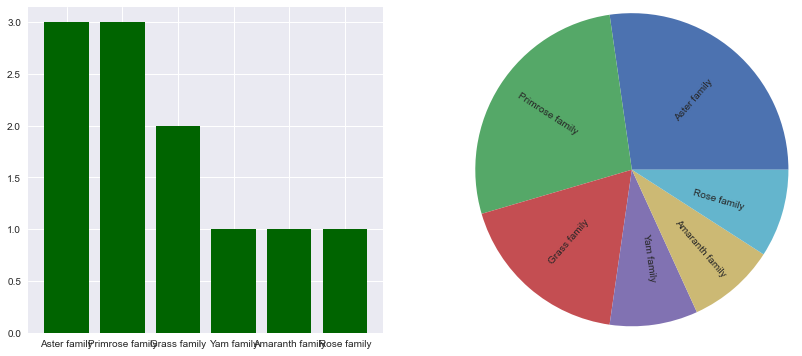

In [375]:
recent  =plants_df[plants_df['year'] >= 2001]
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(recent['family_common_name'].value_counts().index,
       recent['family_common_name'].value_counts(),
      color='darkgreen')
ax[1].pie(recent['family_common_name'].value_counts(),
      labels=recent['family_common_name'].value_counts().index,
      radius=1.2, labeldistance=0.4, rotatelabels=True);